In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from collections import Counter

# NLP libraries
# Ensure you have these installed: pip install transformers nltk wordcloud
from transformers import pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Visualization libraries
# Ensure you have these installed: pip install plotly matplotlib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize("test")
except LookupError:
    nltk.download('punkt')

print("Libraries imported successfully!")

Libraries imported successfully!


In [19]:
# Download necessary NLTK data (if not already downloaded)
import nltk
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize("test")
except LookupError:
    nltk.download('punkt')

# Explicitly download 'punkt_tab' resource
try:
    nltk.data.find('tokenizers/punkt_tab/english/')
except LookupError:
    print("Downloading 'punkt_tab'...")
    nltk.download('punkt_tab')


print("Libraries imported successfully!")

Libraries imported successfully!


# Introduction

Welcome to the Hotel Guest Sentiment Analysis Dashboard demonstration!

This notebook showcases a practical application of natural language processing (NLP) and data visualization to extract actionable insights from hotel guest reviews. As a professional with over 10 years in hospitality leadership and a strong background in computational research and data science, this project exemplifies my ability to bridge the gap between guest experience management and cutting-edge AI techniques.


Project Goals:

Analyze guest sentiment from reviews.
Identify key aspects driving positive and negative feedback.
Visualize trends and patterns to inform business decisions.
Demonstrate skills in NLP, machine learning, and data visualization relevant to the hospitality sector.
This approach directly addresses the industry's need for data-driven strategies to enhance guest experiences and optimize operations, similar to how I've implemented data-driven decision-making in previous hospitality management roles.

# Data Loading and Initial Exploration

For this demonstration, we'll use a sample dataset of hotel reviews. In a real-world scenario, this data could be sourced via web scraping (e.g., TripAdvisor, Booking.com) or by uploading a CSV file from a hotel's internal feedback system.

In [20]:
# Sample Data
data = {
    'review_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'review_date': pd.to_datetime([
        '2023-01-15', '2023-01-20', '2023-02-10', '2023-02-25', '2023-03-05',
        '2023-03-15', '2023-04-01', '2023-04-18', '2023-05-05', '2023-05-22',
        '2023-06-10', '2023-06-20', '2023-07-01', '2023-07-15', '2023-08-05',
        '2023-08-19', '2023-09-01', '2023-09-25', '2023-10-10', '2023-10-30'
    ]),
    'review_text': [
        "The room was spacious and clean, and the staff were incredibly friendly. Breakfast was delicious too!",
        "Awful experience. The AC was broken and the front desk was unhelpful. Will not return.",
        "Great location and comfortable beds. The check-in process was smooth.",
        "Good value for money. The restaurant staff needs more training, they were quite slow.",
        "Absolutely loved the view from my room! The concierge was very helpful with recommendations.",
        "The pool area is fantastic, but the Wi-Fi in the room was terrible and kept disconnecting.",
        "Very average hotel. Room was okay, nothing special. Service was a bit impersonal.",
        "Excellent service from everyone we encountered. The food at the hotel restaurant was top-notch. Room was quiet.",
        "Disappointed with the cleanliness of the bathroom. The bed was comfortable though. Staff at reception were nice.",
        "The gym facilities are outdated. However, the location is perfect for sightseeing. Breakfast was decent.",
        "A truly luxurious stay! From the valet to the room service, everything was impeccable. The bed was like a cloud.",
        "The noise from the street was unbearable, and the windows didn't seem to block it. Staff tried their best.",
        "Friendly staff, especially at the bar. The room was a bit small for the price, but clean. Good amenities.",
        "Overall a pleasant stay. The breakfast buffet had a wide variety. The room cleaning service was prompt.",
        "The decor is a bit dated, but the hotel is well-maintained. Staff were professional and efficient. Good for business travel.",
        "Had an issue with billing that took a while to resolve. The room itself was fine, comfy bed. Location is convenient.",
        "Exceptional customer service! They went above and beyond. The spa services were also very relaxing. Room view was stunning.",
        "Terrible food quality at the included breakfast. The room was also quite dusty. Front desk seemed overwhelmed.",
        "The check-out was chaotic. Room service was quick, and the food was good. Mixed feelings overall. The lobby is beautiful.",
        "Fantastic hotel for a family vacation. Kids loved the pool. Staff were very accommodating to our needs. Clean rooms."
    ],
    'hotel_service_area_guess': [ # aspect analysis =>
        'Overall', 'Room/Staff', 'Location/Room', 'Value/Staff', 'Room/Staff',
        'Amenities/Room', 'Overall', 'Staff/F&B', 'Room/Cleanliness', 'Amenities/Location',
        'Overall', 'Room/Noise', 'Staff/Room', 'Overall/F&B', 'Overall/Staff',
        'Billing/Room', 'Staff/Amenities', 'F&B/Room', 'Staff/F&B', 'Overall/Staff'
    ]
}
reviews_df = pd.DataFrame(data)

print("Sample data loaded:")
reviews_df.head()

Sample data loaded:


,review_id,review_date,review_text,hotel_service_area_guess
0,1,2023-01-15,"The room was spacious and clean, and the staff...",Overall
1,2,2023-01-20,Awful experience. The AC was broken and the fr...,Room/Staff
2,3,2023-02-10,Great location and comfortable beds. The check...,Location/Room
3,4,2023-02-25,Good value for money. The restaurant staff nee...,Value/Staff
4,5,2023-03-05,Absolutely loved the view from my room! The co...,Room/Staff


A quick look at our data structure. review_text is our primary target for analysis. review_date will allow for temporal trend analysis. hotel_service_area_guess is a placeholder for aspect-based sentiment, which we'll refine.

In [21]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2] # Remove stop words and short words
    return " ".join(tokens)

reviews_df['cleaned_text'] = reviews_df['review_text'].apply(preprocess_text)

print("\nData with cleaned text:")
reviews_df[['review_text', 'cleaned_text']].head()


Data with cleaned text:


,review_text,cleaned_text
0,"The room was spacious and clean, and the staff...",room spacious clean staff incredibly friendly ...
1,Awful experience. The AC was broken and the fr...,awful experience broken front desk unhelpful r...
2,Great location and comfortable beds. The check...,great location comfortable beds checkin proces...
3,Good value for money. The restaurant staff nee...,good value money restaurant staff needs traini...
4,Absolutely loved the view from my room! The co...,absolutely loved view room concierge helpful r...


# Sentiment Analysis

We'll use a pre-trained transformer model (specifically, a model fine-tuned for sentiment analysis) from the Hugging Face transformers library. These models are powerful and can understand context, providing more accurate sentiment scores than traditional lexicon-based methods. This aligns with my experience in LLM applications and fine-tuning

In [22]:
# Load a pre-trained sentiment analysis pipeline
# Using a distilled version for speed in a demo, but larger models like RoBERTa or BERT could be used.
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Apply sentiment analysis
# Note: Batch processing is more efficient for large datasets
# For simplicity in the demo, we process row by row.
sentiment_results = []
for text in reviews_df['review_text']: # Analyze original text for better context
    try:
        result = sentiment_analyzer(text[:512])[0] # Truncate to max model input length if necessary
        sentiment_results.append(result)
    except Exception as e:
        print(f"Error processing text: {text[:50]}... Error: {e}")
        sentiment_results.append({'label': 'NEUTRAL', 'score': 0.0}) # Default on error

reviews_df['sentiment_label'] = [r['label'] for r in sentiment_results]
reviews_df['sentiment_score'] = [r['score'] if r['label'] == 'POSITIVE' else 1 - r['score'] if r['label'] == 'NEGATIVE' else 0.5 for r in sentiment_results]
# Adjusting score: Positive scores are high, negative scores are low for easier numerical analysis.
# Original model output: POSITIVE with score X (confidence in positive), NEGATIVE with score Y (confidence in negative)
# We want a single scale, e.g., 0-1 where >0.5 is positive.
# If label is POSITIVE, score is confidence. If NEGATIVE, score is 1 - confidence_in_negative (closer to 0).

print("\nData with sentiment scores:")
reviews_df[['review_text', 'sentiment_label', 'sentiment_score']].head()

Device set to use cpu



Data with sentiment scores:


,review_text,sentiment_label,sentiment_score
0,"The room was spacious and clean, and the staff...",POSITIVE,0.999883
1,Awful experience. The AC was broken and the fr...,NEGATIVE,0.000268
2,Great location and comfortable beds. The check...,POSITIVE,0.999789
3,Good value for money. The restaurant staff nee...,NEGATIVE,0.000580
4,Absolutely loved the view from my room! The co...,POSITIVE,0.999849


# Aspect-Based Sentiment Analysis (Simplified)

To understand what guests are talking about, we can perform a simplified aspect extraction. We'll define keywords for common hotel aspects and see which aspects are mentioned in reviews. Then, we can associate the overall sentiment of the review with these aspects.

More advanced techniques (like those I've worked on involving semantic space alignment ) could be used for more nuanced aspect detection and even cross-lingual analysis, which is crucial given the global nature of hospitality and my proficiency in multiple languages.

In [23]:
aspect_keywords = {
    "Room Comfort & Cleanliness": ["room", "bed", "sleep", "clean", "bathroom", "spacious", "quiet", "view", "ac", "heating"],
    "Staff & Service": ["staff", "service", "friendly", "helpful", "rude", "unhelpful", "concierge", "reception", "desk", "check-in", "checkout"],
    "F&B (Food & Beverage)": ["food", "breakfast", "dinner", "restaurant", "bar", "drink", "delicious", "tasty", "menu"],
    "Amenities": ["pool", "gym", "wifi", "spa", "parking", "facilities"],
    "Location": ["location", "view", "area", "convenient", "close", "transport"],
    "Value": ["price", "value", "money", "expensive", "cheap", "worth"],
    "Noise": ["noise", "loud", "quiet", "noisy", "sound"]
}

def extract_aspects(cleaned_text):
    found_aspects = []
    for aspect, keywords in aspect_keywords.items():
        if any(keyword in cleaned_text for keyword in keywords):
            found_aspects.append(aspect)
    return found_aspects if found_aspects else ["General"]

reviews_df['aspects'] = reviews_df['cleaned_text'].apply(extract_aspects)

# Explode the DataFrame for reviews that mention multiple aspects
reviews_exploded_aspects = reviews_df.explode('aspects')

print("\nReviews with extracted aspects (first 10 rows of exploded view):")
reviews_exploded_aspects[['cleaned_text', 'aspects', 'sentiment_label']].head(10)

# Calculate average sentiment per aspect
aspect_sentiment = reviews_exploded_aspects.groupby('aspects')['sentiment_score'].mean().sort_values(ascending=False)
aspect_sentiment_df = aspect_sentiment.reset_index()

print("\nAverage sentiment score per aspect:")
print(aspect_sentiment_df)


Reviews with extracted aspects (first 10 rows of exploded view):

Average sentiment score per aspect:
                      aspects  sentiment_score
0                       Noise         0.980316
1                    Location         0.832902
2  Room Comfort & Cleanliness         0.811805
3                   Amenities         0.800468
4       F&B (Food & Beverage)         0.749678
5             Staff & Service         0.745876
6                       Value         0.500034


# Visualization Dashboard Components

Now, let's create visualizations. Interactive dashboards are key to transforming complex data into actionable business intelligence, something I focused on in my role as General Manager at Hagen Coffee Roasters. We'll use Plotly for interactive charts.

In [24]:
sentiment_counts = reviews_df['sentiment_label'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment_label', 'count']

fig_pie_sentiment = px.pie(sentiment_counts, names='sentiment_label', values='count',
                           title='Overall Guest Sentiment Distribution',
                           color='sentiment_label',
                           color_discrete_map={'POSITIVE': 'green', 'NEGATIVE': 'red', 'NEUTRAL': 'lightgrey'})
fig_pie_sentiment.update_layout(title_x=0.5)
fig_pie_sentiment.show()

# Sentiment Trends Over Time

Tracking sentiment changes over time helps identify the impact of operational changes or seasonal effects. This is crucial for dynamic pricing models and demand forecasting.

In [25]:
# Resample data by month for trend analysis
# Ensure 'review_date' is datetime and 'sentiment_score' is numeric
reviews_df['review_month'] = reviews_df['review_date'].dt.to_period('M')
monthly_sentiment = reviews_df.groupby('review_month')['sentiment_score'].mean().reset_index()
monthly_sentiment['review_month'] = monthly_sentiment['review_month'].dt.to_timestamp() # Convert Period to Timestamp for Plotly

fig_trend_sentiment = px.line(monthly_sentiment, x='review_month', y='sentiment_score',
                              title='Average Sentiment Score Over Time',
                              markers=True)
fig_trend_sentiment.update_layout(yaxis_title='Average Sentiment Score (0=Negative, 1=Positive)', xaxis_title='Month', title_x=0.5)
fig_trend_sentiment.show()

# Sentiment by Aspect/Service Area

This visualization helps pinpoint specific areas of strength and weakness within the hotel's operations. This data can directly inform staff training, resource allocation, and marketing efforts.

In [26]:
fig_aspect_sentiment = px.bar(aspect_sentiment_df, x='aspects', y='sentiment_score',
                              color='sentiment_score',
                              color_continuous_scale=px.colors.diverging.RdYlGn,
                              range_color=[0,1], # Assuming sentiment score is normalized 0-1
                              title='Average Sentiment Score by Hotel Aspect')
fig_aspect_sentiment.update_layout(xaxis_title='Hotel Aspect',
                                   yaxis_title='Average Sentiment Score (0=Negative, 1=Positive)',
                                   coloraxis_colorbar_title='Sentiment',
                                   title_x=0.5)
fig_aspect_sentiment.show()

# Word Clouds for Positive and Negative Sentiment Drivers

Word clouds offer a quick visual summary of the most frequent terms in positive and negative reviews, highlighting key themes.

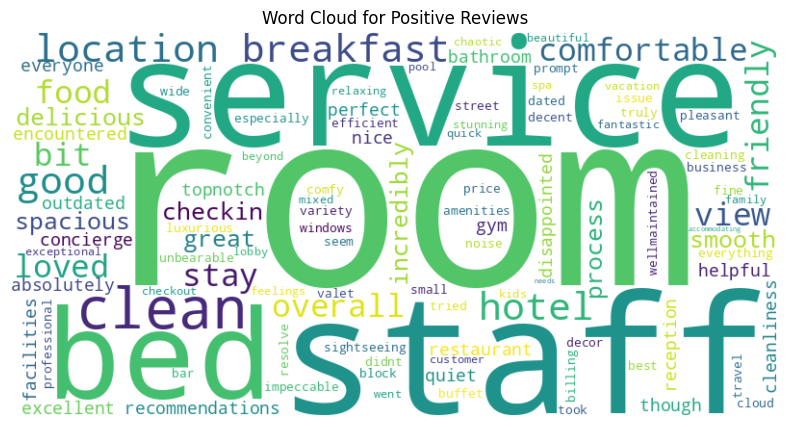

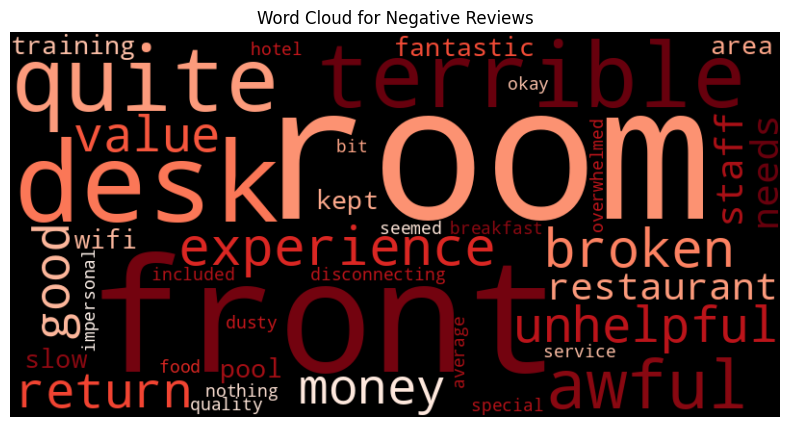

In [27]:
positive_reviews_text = " ".join(reviews_df[reviews_df['sentiment_label'] == 'POSITIVE']['cleaned_text'])
negative_reviews_text = " ".join(reviews_df[reviews_df['sentiment_label'] == 'NEGATIVE']['cleaned_text'])

# Generate word clouds
if positive_reviews_text:
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Positive Reviews")
    plt.show()
else:
    print("No positive reviews to generate a word cloud.")

if negative_reviews_text:
    wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Negative Reviews")
    plt.show()
else:
    print("No negative reviews to generate a word cloud.")

# Actionable Business Insights & Recommendations (Example)

Based on the visualizations above, a hotel manager could derive several actionable insights:

Overall Sentiment: If the pie chart shows a high percentage of negative reviews, immediate attention is needed.
Sentiment Trends: A declining trend in sentiment (e.g., the line chart for "Average Sentiment Score Over Time") could indicate emerging operational issues or that recent changes have had a negative impact. This is where data-driven decision-making becomes vital.
Aspect Sentiment:
If "F&amp;B" has a low average sentiment score (from the bar chart), this might trigger a review of menu quality, service speed in the restaurant, or breakfast offerings. This reminds me of my work developing dynamic pricing and inventory systems for F&amp;B operations.
High scores in "Staff & Service" could be leveraged in marketing materials.
Word Clouds:
If "dirty" or "broken" appears prominently in the negative word cloud, it signals a need to review housekeeping protocols or maintenance schedules.
Words like "friendly," "helpful," or "delicious" in the positive cloud confirm what's working well.
This data-driven approach allows for targeted improvements, optimizing resource allocation and ultimately enhancing the guest experience and potentially revenue, drawing from my experience in developing AI-driven revenue optimization models.

# Advanced Features (Future Development)

This demonstration covers the core functionality. The project could be extended with more advanced features:

Anomaly Detection: Automatically flag sudden, significant drops in sentiment for specific aspects or overall, prompting immediate investigation.
Comparative Benchmarking: If data from competitor hotels is available, benchmark sentiment scores to understand competitive positioning.
Predictive Forecasting: Use historical sentiment trends and other data (e.g., booking patterns, seasonality) to forecast future guest sentiment, enabling proactive measures. This leverages skills in predictive modeling and demand forecasting.

Sophisticated Aspect Extraction: Employ more advanced NLP models or even custom-trained models for finer-grained and more accurate aspect detection and sentiment attribution. My research in semantic space alignment could be highly relevant here.
Multilingual Support: Extend the pipeline to analyze reviews in multiple languages, reflecting my multilingual capabilities  and research in cross-lingual processing.

# Conclusion

This notebook has demonstrated a prototype for a hotel guest sentiment analysis dashboard. By combining NLP techniques with interactive visualizations, we can transform raw guest feedback into valuable insights that drive strategic business decisions in the hospitality sector.

This project directly showcases the synergy between deep hospitality industry knowledge  and advanced data science expertise, providing a powerful tool for enhancing guest satisfaction and operational efficiency.